### Links

* https://wiseodd.github.io/techblog/2016/06/22/nn-optimization/ (Nasterov Momementum)
* https://wiseodd.github.io/techblog/2016/06/21/nn-sgd/ (Implementing Minibatch Gradient Descent)
* https://gitlab.com/erehm/PiecewiseG1BezierFit (MATLAB Fitting a Bezier curve)
* https://github.com/soswow/fit-curve/blob/1bc4dd6fd43e21052a0e706d5de57e801bc35085/python/fitCurves.py (Python implementation of fitCurve)
* 

In [3]:
import _MEWtools as mt
import multiprocessing

## Get baseline time for CPU Intensive Workload

In [4]:
iterations = 5

def slow_worker():
    for i in range(8000):
        square = i**i

    print('Done')

In [5]:
import time

# t0 = time.time()

# for i in range(iterations):
#     slow_worker()

# t1 = time.time()

# total = t1-t0
# display(f'Total Execution Time: {total} seconds')

## Perform same operation with multiprocessing

In [6]:
t0 = time.time()

pool = multiprocessing.Pool(iterations)
for i in range(iterations):
    pool.apply_async(slow_worker)
    
pool.close()
pool.join()

t1 = time.time()

total = t1-t0
display(f'Total Execution Time: {total} seconds')

Done
Done
Done
Done
Done


'Total Execution Time: 2.4952800273895264 seconds'

## Load an interior structure from a config file and populate a MEWTools Satellite

In [7]:
import utils

overrides = {
    'obliquity': 0,
    'obliquityPhase': 0,
    'obliquityPhaseRate': 0,
    'spinRate': 0,
    'nonSynchronusRotationRate': 0,
    'librationAmplitude': 0,
    'librationPhase': 0,
    'librationFrequency': 0
}

sample_sat = utils.import_structure('Sample', overrides)

In [8]:
structures = utils.list_structures()
structures

Sample


['Sample']

In [9]:
import sympy as sym
import numpy as np

r, θ, φ, t = sym.symbols('r θ φ t', real = True)
sample_sat.tt.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
sample_sat.tt.expand()

-13369.3872888062*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) - 14.6928130577004*I*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 93585.7110216432*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 102.849691403903*I*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) - 13690.1623044156*cos(2.04661263817508e-5*t)*cos(2*θ) - 117.875147128307*I*cos(2.04661263817508e-5*t)*cos(2*θ) - 22175.3871428071*cos(2.04661263817508e-5*t) + 9.90608959403469*I*cos(2.04661263817508e-5*t) - 8805.99985400096*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 24.5989026517351*I*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 61641.9989780067*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ) - 172.192318562146*I*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ)

## Performance comparison of different evaluation methods

In [10]:
import math

fm = sym.lambdify([t, φ, θ], sample_sat.PC1, modules = ["math", {"cot": math.atan}])
fn = sym.lambdify([t, φ, θ], sample_sat.PC1, modules = ["numpy", {"cot": np.arctan}])

# numpy
t0 = time.time()

for i in range(10000):
    fm(0, np.pi/2, np.pi/2)

t1 = time.time()

total = t1-t0
display(f'Total Execution Time for math lamdify: {total} seconds')

#math
t0 = time.time()

for i in range(10000):
    fn(0, np.pi/2, np.pi/2)

t1 = time.time()

total = t1-t0
display(f'Total Execution Time for numpy lamdify: {total} seconds')



# Expand
t0 = time.time()

for i in range(10000):
     sample_sat.PC1.subs(t, 0).subs(φ,np.pi/2).subs(θ,np.pi/2).expand()

t1 = time.time()

total = t1-t0
display(f'Total Execution Time for expand(): {total} seconds')


print(sample_sat.PC1.subs(t, 0).subs(φ,np.pi/2).subs(θ,np.pi/2).expand())
print(fm(0, np.pi/2, np.pi/2))
print(fn(0, np.pi/2, np.pi/2))

'Total Execution Time for math lamdify: 0.044358253479003906 seconds'

'Total Execution Time for numpy lamdify: 0.38097095489501953 seconds'

'Total Execution Time for expand(): 0.8006389141082764 seconds'

16970.4496767830
16970.449676782948
16970.449676782948


In [11]:
# ttR = sym.re(sample_sat.tt.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand())
# ppR = sym.re(sample_sat.pp.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand())
# tpR = sym.re(sample_sat.tp.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand())

# import time

# diffs = []
# for i in range(1000):
#     t0 = time.time()

#     val1 = sample_sat.PC1.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
#     val2 = sample_sat.PC2.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
#     val3 = sample_sat.PCΨ.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
#     val4 = sample_sat.PCΨ2.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()

#     t1 = time.time()

#     total1 = t1-t0
# #     display(f'Total Execution Time: {total1} seconds')

#     import math
#     t0 = time.time()

#     pc1  = (1/2) * (ttR + ppR + math.sqrt(4*tpR**2 + (ttR-ppR)**2))
#     pc2  = (1/2) * (ttR + ppR - math.sqrt(4*tpR**2 + (ttR-ppR)**2))
#     pc3  = (1/2) * math.atan( (2*tpR)/(ttR-ppR))
#     pc4 = (1/2) * math.atan2((2*tpR),(ttR-ppR))

#     t1 = time.time()

#     total2 = t1-t0
# #     display(f'Total Optimized Execution Time: {total2} seconds')
#     diffs.append(total1 - total2)
    
# np.average(diffs)

## Checking degrees to radians performance with constant vs equation

In [12]:
import time
import numpy as np

ITERATIONS = 1000000

t0 = time.time()

for i in range(ITERATIONS):
    rads = np.radians(60)

t1 = time.time()

total_np = t1-t0
display(f'Rads: {rads}')
display(f'Total Full Execution Time: {total_np} seconds')

# With constant
t0 = time.time()

rad_multiplier = np.pi / 180
for i in range(ITERATIONS):
    rads = 60 * rad_multiplier

t1 = time.time()

total_const = t1-t0
display(f'Rads: {rads}')
display(f'Total Execution Time: {total_const} seconds')

percent_faster = round(((total_np-total_const)/total_np) * 100, 2)
display(f'Using a constant is {percent_faster}% faster than using numpy.radians')

'Rads: 1.0471975511965976'

'Total Full Execution Time: 0.8956191539764404 seconds'

'Rads: 1.0471975511965976'

'Total Execution Time: 0.08097982406616211 seconds'

'Using a constant is 90.96% faster than using numpy.radians'

**Theta = Longitude**

**Phi = Latitude**

## Lets try to build a grid

In [13]:
# import pandas as pd
# import numpy as np
# import math
# import sympy as sym
# import multiprocessing, logging

# logger = multiprocessing.log_to_stderr()
# logger.setLevel(logging.INFO)

# r, θ, φ, t = sym.symbols('r θ φ t', real = True)

# t0 = time.time()

# sat = utils.import_structure('Sample', overrides)

# t1 = time.time()
# total = (t1 - t0)
           
# print(f'Load Structure time: {total}')

# TIME_STEPS = 360
# MIN_LAT = -75
# MAX_LAT = 90
# MIN_LON = 0
# MAX_LON = 360
# RAD_MULTIPLIER = np.pi / 180

# data = []

# principal1_func = sym.lambdify([t, φ, θ], sample_sat.PC1, modules = ["math", {"cot": math.atan}])
# principal2_func = sym.lambdify([t, φ, θ], sample_sat.PC2, modules = ["math", {"cot": math.atan}])
# principal_phi_func = sym.lambdify([t, φ, θ], sample_sat.PCΨ, modules = ["math", {"cot": math.atan}])
# principal_phi2_func = sym.lambdify([t, φ, θ], sample_sat.PCΨ2, modules = ["math", {"cot": math.atan}])


# def callback(stress_items):
#     data.extend(stress_items)
    

# def get_stress_for_lat(step, lat):
#     results = []
# #     lat_radians = lat * RAD_MULTIPLIER
#     lat_radians = np.radians(lat)
#     step_value = step / TIME_STEPS
    
#     logger.info("ABOUT TO PERFORM CALCULATIONS")
    
#     for lon in range(MIN_LON, MAX_LON + 1, 10):
#         if (lat == 90 or lon == 0):
#             continue
            
# #         lon_radians = np.Radians(lon) * RAD_MULTIPLIER
#         lon_radians = np.radians(lon)

#         principal1 = principal1_func(step_value, lat_radians, lon_radians)
# #         principal1 = sat.PC1.subs(t,step_value).subs(φ,lat_radians).subs(θ,lon_radians).expand()

#         principal2 = principal2_func(step, lat_radians, lon_radians)
#         principal_phi = principal_phi_func(step, lat_radians, lon_radians)
#         principal_phi2 = principal_phi2_func(step, lat_radians, lon_radians)        

#         max_stress = max(principal1, principal2)
#         max_stress_orientation = principal_phi if max_stress == principal1 else principal_phi2
  
        
#         results.append({
#                 'time_step': step,
#                 'latitude': lat,
#                 'longitude': lon,
#                 'principal1': principal1,
#                 'principal2': principal2,
#                 'principal_orientation': np.rad2deg(principal_phi),
#                 'principal_orientation2': np.rad2deg(principal_phi2),
#                 'max_stress': max_stress,
#                 'max_stress_orientation': np.rad2deg(max_stress_orientation)
#             })
        
#     return results

    
# pool = multiprocessing.Pool()

# t0 = time.time()

# for step in range(TIME_STEPS):
#     for lat in range(MIN_LAT, MAX_LAT + 1, 15):
#         pool.apply_async(get_stress_for_lat, args = (step, lat, ), callback=callback)
# #         data.extend(get_stress_for_lat(step, lat))
            
# pool.close()
# pool.join()
            
# t1 = time.time()
# total = (t1 - t0)
           
# print(f'Calculation time: {total}')

# df = pd.DataFrame(data)   
# t2 = time.time()
# print(f'DataFrame Creation time: {t2 - t1}')


In [14]:
# lat = 60
# lon = 250

# print(principal1_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))
# print(principal2_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))
# print(principal_phi_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))
# print(principal_phi2_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))

In [15]:
# df.sort_values(['latitude', 'longitude', 'time_step'])

In [7]:
import StressTools as tools
import utils
import time

t0 = time.time()

sat = utils.import_structure('Sample')

t1 = time.time()
total = (t1 - t0)
           
print(f'Load Structure time: {total}')


Load Structure time: 3.9733359813690186


In [8]:
t0 = time.time()

europa_orbit_seconds = 85 * 3600
df = tools.build_stress_field(sat, europa_orbit_seconds, rotations=2)

t1 = time.time()
total = (t1 - t0)
           
print(f'Build Stress Field time: {total}')

Build Stress Field time: 2.263347864151001


,time_step,latitude,longitude,principal1,principal2,principal_orientation,principal_orientation2,max_stress,max_stress_orientation
365,1,45,60,30103.631107,-19734.841047,19.735954,-70.264046,30103.631107,19.735954
689,2,45,60,30351.181289,-18583.126338,20.163601,-69.836399,30351.181289,20.163601
1085,3,45,60,30595.204147,-17431.445559,20.607383,-69.392617,30595.204147,20.607383
1445,4,45,60,30835.952770,-16280.474166,21.068288,-68.931712,30835.952770,21.068288
1877,5,45,60,31073.707950,-15130.914115,21.547371,-68.452629,31073.707950,21.547371
...,...,...,...,...,...,...,...,...,...
282929,715,45,60,27869.951998,-29284.694310,16.678998,-73.321002,27869.951998,16.678998
283685,716,45,60,28153.887677,-28156.232339,17.003053,-72.996947,28153.887677,17.003053
283793,717,45,60,28433.015956,-27022.962258,17.337035,-72.662965,28433.015956,17.337035
284189,718,45,60,28707.426602,-25885.401256,17.681523,-72.318477,28707.426602,17.681523


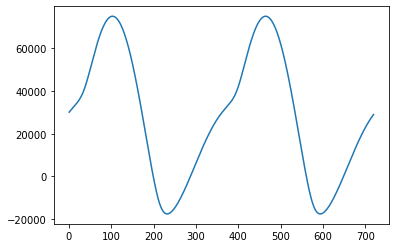

In [9]:
data = df.loc[(df['latitude'] == 45) & (df['longitude'] == 60)] \
    .sort_values('time_step')

import matplotlib.pyplot as plt

plt.plot(data['time_step'], data['principal1'])
data

In [19]:
import numpy as np
import legacy.StressEQs as stress1
import StressEquations as stress2

In [20]:
result1 = stress1.getStress(
    interior=1, 
    e_in=0.01, 
    colat=np.radians(45), 
    lon=np.radians(60), 
    steps=360, 
    this_step=5,
    oblq=0.1,
    phase=0.1,
    NSRdelta=42
)
print(result1)

result2 = stress2.getStress(
    interior_value='interior1', 
    e_in=0.01, 
    colat=np.radians(45), 
    lon=np.radians(60), 
    steps=360, 
    this_step=5,
    oblq=0.1,
    phase=0.1,
    NSRdelta=42
)
print(result2)

abs(np.array(result1) - np.array(result2))

(71.8810108076292, 3.2669857015654484)
(71.88101084929254, 3.2669857043257293)


array([4.16633412e-08, 2.76028089e-09])

In [21]:
import utils

value = utils.import_interior('interior1')
display(value)

In [22]:
value.modal_strengths

[-3.425221799746515e-12,
 -1.0256907477820026e-11,
 -1.4253580481622307e-11,
 -1.0926996197718631e-10,
 -5.768155893536122e-06,
 -3.247433460076046e-05]

In [23]:
import numpy as np

points = [
    (1, 1),
    (2, 3),
    (4, 5),
    (6, 7),
    (8, 8),
    (11, 6),
    (12, 4),
    (12, 1)
]
points = np.array(points)

In [24]:
import curves.fitCurves as fit

result = fit.fitCurve(points, 1)
result

[[array([1, 1]),
  array([4.17726084, 7.35452168]),
  array([12.        , 10.86410171]),
  array([12,  1])]]

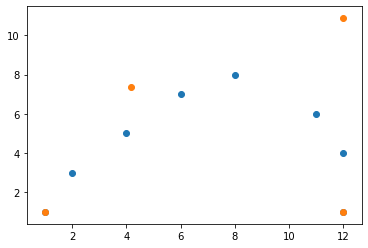

In [25]:
x = [point[0] for point in points]
y = [point[1] for point in points]

x2 = [point[0] for point in result[0]]
y2 = [point[1] for point in result[0]]

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.scatter(x2, y2)

### Cubic Bezier Equation

$$B'(t) = (1 - t)^3P_0 + 3(1 - t)^2tP_1 + 3(1-t)t^2P_2 + t^3P_3, 0 \le t \le 1$$

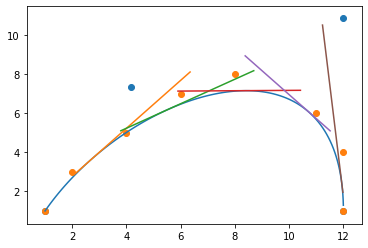

In [26]:
import numpy as np
import curves.bezier as bezier
import StressEquations as stress
import utils

curve = result[0]

bpoints = []
for t in np.arange(0, 1, 0.01):
    point = bezier.q(result[0], t)
    bpoints.append(point)
    
x = [point[0] for point in bpoints]
y = [point[1] for point in bpoints]

x2 = [point[0] for point in result[0]]
y2 = [point[1] for point in result[0]]

x3 = [point[0] for point in points]
y3 = [point[1] for point in points]

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.scatter(x2, y2)
plt.scatter(x3, y3)

for time in np.arange(0.15, 1, 0.2):
    direction = bezier.findCubicRPoints(curve, time)
    dirX = [point[0] for point in direction]
    dirY = [point[1] for point in direction]
    plt.plot(dirX, dirY)


## Observed Cycloids

In [27]:
import pandas as pd

df = pd.read_csv("./obsData/AlexLonLatCut.txt", header=None, sep=' ', names=['lon', 'lat'])
df

,lon,lat
0,10.867,17.140
1,10.925,17.221
2,11.041,17.326
3,11.168,17.418
4,11.389,17.511
...,...,...
67,30.526,14.576
68,31.191,14.012
69,31.552,13.742
70,31.833,13.494


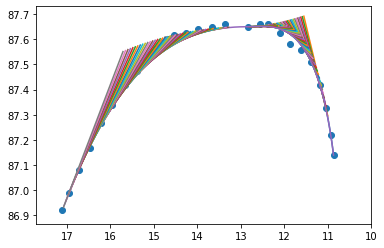

In [28]:
firstArc = df[0:26]

def translate(point):
    return (point[0], point[1] + 70)
    
points = np.array(firstArc)
points = np.array(list(map(translate, points)))

controls = fit.fitCurve(points, 0.05)


plt.xlim(17.7, 10)
# plt.ylim(15, 18)

plt.scatter(firstArc['lon'], firstArc['lat'] + 70)
# plt.scatter(x, y)

bpoints = []

for control in controls:
    for t in np.arange(0, 1, 0.01):
        point = bezier.q(control, t)
        bpoints.append(point)
    
    x = [point[0] for point in bpoints]
    y = [point[1] for point in bpoints]
    plt.plot(x, y)
    
    for time in np.arange(0.15, 1, 0.02):
        direction = bezier.findCubicRPoints(control, time)
        dirX = [point[0] for point in direction]
        dirY = [point[1] for point in direction]
        plt.plot(dirX, dirY)

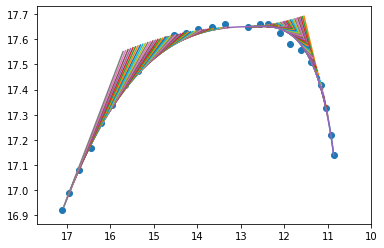

In [29]:
points = np.array(firstArc)

controls2 = fit.fitCurve(points, 0.05)


plt.xlim(17.7, 10)
# plt.ylim(15, 18)

plt.scatter(firstArc['lon'], firstArc['lat'])
# plt.scatter(x, y)

bpoints = []

for control in controls2:
    for t in np.arange(0, 1, 0.01):
        point = bezier.q(control, t)
        bpoints.append(point)
    
    x = [point[0] for point in bpoints]
    y = [point[1] for point in bpoints]
    plt.plot(x, y)
    
    for time in np.arange(0.15, 1, 0.02):
        direction = bezier.findCubicRPoints(control, time)
        dirX = [point[0] for point in direction]
        dirY = [point[1] for point in direction]
        plt.plot(dirX, dirY)

In [ ]:
points

In [ ]:
controls

# Try fitting Delphi

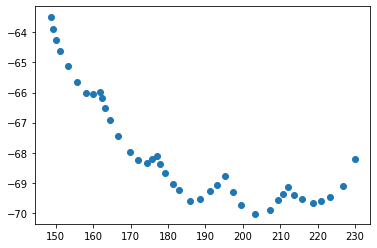

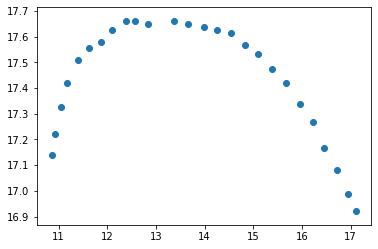

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import curves.bezier as bezier
import curves.fitCurves as fit
import curves.fitArcs as fitArcs
import StressTools as tools

def round_heading(value, base=5):
    return base * round(value / base)

def calculate_loss(frame):
    diffs = np.diff(frame.sort_values('pointNumber')['pointNumber'])
    
    edges = frame.iloc[[0, -1]]
    startDiff = edges.iloc[0].pointNumber - 1
    endDiff = 100 - edges.iloc[1].pointNumber
    
    diffs = np.append(diffs, [startDiff, endDiff])
    return max(diffs)

TOLERANCE = 1

delphi = pd.read_csv("./obsData/DelphiLonLatAT.txt", header=None, sep=' ', names=['lon', 'lat'])
delphi = delphi.sort_values(['lon', 'lat'])

plt.scatter(delphi['lon'], delphi['lat'])

plt.figure()

plt.scatter(firstArc['lon'], firstArc['lat'])


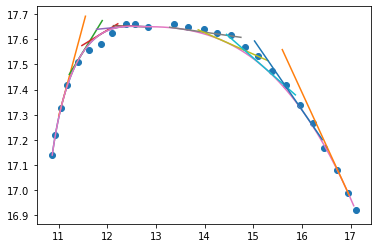

In [31]:
points = np.array(firstArc)

controls = fit.fitCurve(points, 0.05)

# plt.xlim(17.7, 10)
# plt.ylim(15, 18)

def findHeading(points, reverse = False):
    if reverse:
        origin = 1
        destination = 0
    else:
        origin = 0
        destination = 1
        
    rise = points[destination][1] - points[origin][1] # lats
    run = points[destination][0] - points[origin][0]  # lons
    
    degrees = np.degrees(np.arctan2(run, rise))
    if degrees < 0:
        degrees += 360
    return degrees if degrees > 180 else degrees + 180

bpoints = []
rows = []

plt.scatter(firstArc['lon'], firstArc['lat'])

pointNumber = 1
for control in controls:
    for t in np.arange(0, 1, 0.01):
        point = bezier.q(control, t)
        bpoints.append(point)
    
        heading = findHeading(bezier.findCubicRPoints(control, t), False)
        heading_reverse = findHeading(bezier.findCubicRPoints(control, t), True)
        rowData = {
            'pointNumber': pointNumber,
            'lon': point[0],
            'lat': point[1],
            'heading': heading,
            'headingCategory': round_heading(heading, TOLERANCE),
            'headingReverse': heading_reverse,
            'headingCategoryReverse': round_heading(heading_reverse, TOLERANCE)
        }
        rows.append(rowData)
        pointNumber += 1
        
    x = [point[0] for point in bpoints]
    y = [point[1] for point in bpoints]
    plt.plot(x, y)
    
    for time in np.arange(0.15, 1, 0.2):
        direction = bezier.findCubicRPoints(control, time)
        dirX = [point[0] for point in direction]
        dirY = [point[1] for point in direction]
        plt.plot(dirX, dirY)
        
df = pd.DataFrame(rows)
# df

In [32]:
def fit_arc(arc, max_error=0.05, reverse=False):
    points = np.array(arc)
    controls = fit.fitCurve(points, max_error)
    
    if reverse:
        controls = controls[::-1]
    
    rows = []
    pointNumber = 1
    for control in controls:
        if reverse:
            control.reverse()
        for time in np.arange(0, 1, 0.01):
            point = bezier.q(control, time)

            heading = findHeading(bezier.findCubicRPoints(control, time))
            rows.append({
                'pointNumber': pointNumber,
                'lon': point[0],
                'lat': point[1],
                'heading': heading,
                'headingCategory': round_heading(heading, TOLERANCE)
            })
            pointNumber += 1
                
    return pd.DataFrame(rows)

### Generate stress field based on our list of coordinates

In [33]:
import StressEquations as stress
import utils

interior = utils.import_interior('interior1')

stresses = []


for point in df.itertuples():
    for step in range(360):
        current = stress.getStress(
            interior_value=interior, 
            e_in=0.01, 
            colat=np.radians(90-point.lat), 
            lon=np.radians(360-point.lon), 
            steps=360, 
            this_step=step,
            oblq=0.25,
            phase=90,
            NSRdelta=0)
        heading_degrees = np.degrees(current[1])
        stresses.append({
            'lon': point.lon,
            'lat': point.lat,
            'stress': current[0],
            'heading': heading_degrees,
            'headingCategory': round_heading(heading_degrees, TOLERANCE),
            'time': step
        })
        
stressFrame = pd.DataFrame(stresses)


In [34]:
def build_stress_field(interior, pointFrame, phase):
    for point in pointFrame.itertuples():
        for step in range(360):
            current = stress.getStress(
                interior_value=interior, 
                e_in=0.01, 
                colat=np.radians(90-point.lat), 
                lon=np.radians(360-point.lon), 
                steps=360, 
                this_step=step,
                oblq=0.25,
                phase=np.radians(phase),
                NSRdelta=0)
            heading_degrees = np.degrees(current[1])
            stresses.append({
                'lon': point.lon,
                'lat': point.lat,
                'stress': current[0],
                'heading': heading_degrees,
                'headingCategory': round_heading(heading_degrees, TOLERANCE),
                'time': step
            })

    return pd.DataFrame(stresses)

### Search for matches in headings between curve and stress field

In [35]:
# Forward propagation

merged = df.merge(
    stressFrame,
    how='left',
    on=['lon', 'lat', 'headingCategory']
)

In [36]:
# merged.loc[not df.isnull(merged['stress'])]
merged = merged.loc[merged['stress'] > 0]
merged['maxStress'] = merged.groupby('pointNumber')['stress'].transform('max')
merged_unique = merged.loc[merged['stress'] == merged['maxStress']]

calculate_loss(merged_unique)

128.0

In [37]:
def match_orientations(curve, stresses):
    merged = curve.merge(
        stresses,
        how='left',
        on=['lon', 'lat', 'headingCategory']
    )
    merged = merged.loc[merged['stress'] > 0]
    merged['maxStress'] = merged.groupby('pointNumber')['stress'].transform('max')
    merged_unique = merged.loc[merged['stress'] == merged['maxStress']]
    
    return merged_unique

In [38]:
# Reverse propagation

# merged = df.merge(
#     stressFrame,
#     how='left',
#     left_on=['lon', 'lat', 'headingCategoryReverse'],
#     right_on=['lon', 'lat', 'headingCategory']
# )

# print(len(merged))
# merged.loc[merged['stress'] > 0]

# # merged.groupby(['lon', 'lat']).size()
# # merged = merged.loc[merged['stress'] > 0]
# merged['maxStress'] = merged.groupby(['lon', 'lat'])['stress'].transform('max')

# merged_unique = merged.loc[merged['stress'] == merged['maxStress']]
# display(merged_unique)
# display(merged)


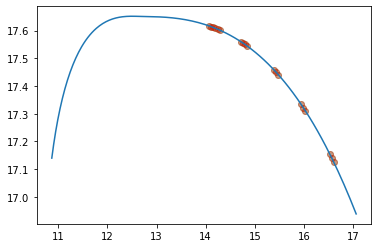

In [39]:
plt.scatter(merged_unique['lon'], merged_unique['lat'], alpha=0.3, color='green')

positive = merged_unique.loc[merged_unique['stress'] > 0]
plt.scatter(positive['lon'], positive['lat'], alpha=0.3, color='red')

x = [point[0] for point in bpoints]
y = [point[1] for point in bpoints]
plt.plot(x, y)

### Brute force search phases

In [24]:
results = []

for phase in range(0, 360, 20):
    field = build_stress_field(interior, df, phase)
    matches = match_orientations(df, field)
    loss = calculate_loss(matches)
    
    results.append({
        'phase': phase,
        'error': loss
    })
    print(f'Calculated for phase {phase}')
    
results = pd.DataFrame(results)
results

Calculated for phase 0
Calculated for phase 20
Calculated for phase 40
Calculated for phase 60
Calculated for phase 80
Calculated for phase 100
Calculated for phase 120
Calculated for phase 140
Calculated for phase 160
Calculated for phase 180
Calculated for phase 200
Calculated for phase 220
Calculated for phase 240
Calculated for phase 260
Calculated for phase 280
Calculated for phase 300
Calculated for phase 320
Calculated for phase 340


,phase,error
0,0,9.0
1,20,9.0
2,40,9.0
3,60,9.0
4,80,9.0
5,100,9.0
6,120,9.0
7,140,9.0
8,160,9.0
9,180,9.0


In [40]:
def test_arc(arc, phase_increment):
    results = []

    for phase in range(0, 361, phase_increment):
        field = build_stress_field(interior, arc, phase)
        matches = match_orientations(arc, field)
        loss = calculate_loss(matches)

        results.append({
            'phase': phase,
            'error': loss
        })
        print(f'Calculated for phase {phase}')

    return pd.DataFrame(results) 
    

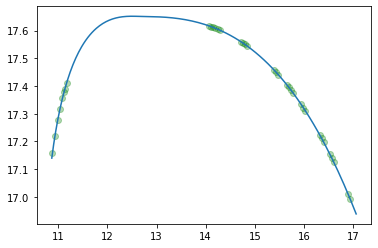

In [41]:
field = build_stress_field(interior, df, 300)
matches = match_orientations(df, field)

plt.scatter(matches['lon'], matches['lat'], alpha=0.3, color='green')

x = [point[0] for point in bpoints]
y = [point[1] for point in bpoints]
plt.plot(x, y)

(array([12.,  1.,  8.,  1.,  5.,  1.,  1.,  4.,  0.,  3.]),
 array([ 2.45716441,  6.4894701 , 10.52177579, 14.55408148, 18.58638717,
        22.61869286, 26.65099856, 30.68330425, 34.71560994, 38.74791563,
        42.78022132]),
 <a list of 10 Patch objects>)

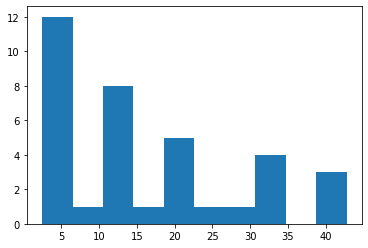

In [42]:
plt.hist(matches['stress'])

<BarContainer object of 36 artists>

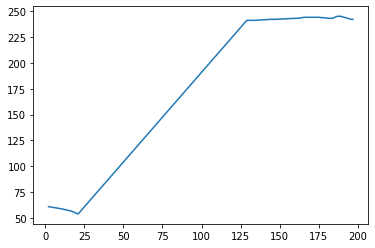

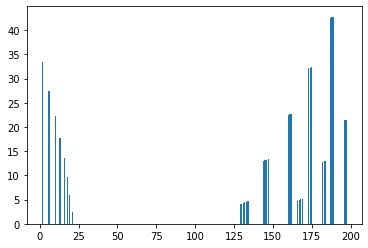

In [43]:
plt.plot(matches['pointNumber'], matches['time'])
plt.figure()
plt.bar(matches['pointNumber'], matches['stress'])

### Experiment: Reversing the control points in a Bezier results in the same exact curve

[array([12.838, 17.65 ]),
 array([14.32154658, 17.65      ]),
 array([15.73825601, 17.54916224]),
 array([17.106, 16.92 ])]

[array([17.106, 16.92 ]),
 array([15.73825601, 17.54916224]),
 array([14.32154658, 17.65      ]),
 array([12.838, 17.65 ])]

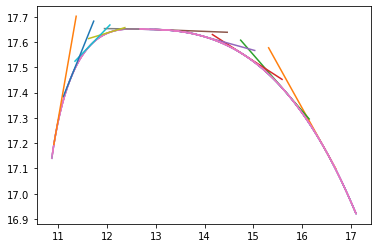

In [44]:
control_rev = control[::-1]
display(control)
display(control_rev)

for control in controls[::-1]:
    control.reverse()
    for t in np.arange(0, 1, 0.01):
        point = bezier.q(control, t)
        bpoints.append(point)
    
    x = [point[0] for point in bpoints]
    y = [point[1] for point in bpoints]
    plt.plot(x, y)
    
    for time in np.arange(0.15, 1, 0.2):
        direction = bezier.findCubicRPoints(control, time)
        dirX = [point[0] for point in direction]
        dirY = [point[1] for point in direction]
        plt.plot(dirX, dirY)

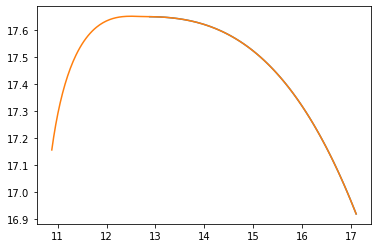

In [45]:
controls = fit.fitCurve(points, 0.05)

bpoints = []
rows = []

pointNumber = 1
for control in controls[::-1]:
    control.reverse()

    for t in np.arange(0, 1, 0.01):
        point = bezier.q(control, t)
        bpoints.append(point)
    
        heading = findHeading(bezier.findCubicRPoints(control, t), False)
        heading_reverse = findHeading(bezier.findCubicRPoints(control, t), True)
        rowData = {
            'pointNumber': pointNumber,
            'lon': point[0],
            'lat': point[1],
            'heading': heading,
            'headingCategory': round_heading(heading, TOLERANCE),
            'headingReverse': heading_reverse,
            'headingCategoryReverse': round_heading(heading_reverse, TOLERANCE)
        }
        rows.append(rowData)
        pointNumber += 1
        
    x = [point[0] for point in bpoints]
    y = [point[1] for point in bpoints]
    plt.plot(x, y)
        
df_reverse = pd.DataFrame(rows)

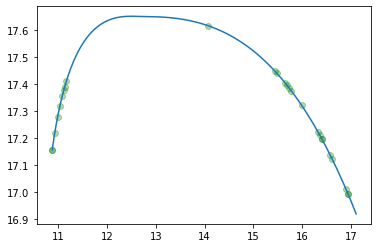

In [46]:
field = build_stress_field(interior, df_reverse, 300)
matches = match_orientations(df_reverse, field)

plt.scatter(matches['lon'], matches['lat'], alpha=0.3, color='green')

x = [point[0] for point in bpoints]
y = [point[1] for point in bpoints]
plt.plot(x, y)

<BarContainer object of 26 artists>

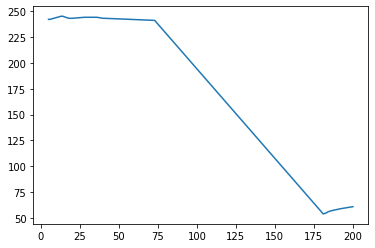

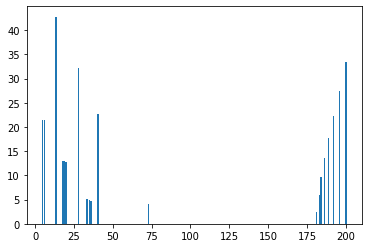

In [47]:
plt.plot(matches['pointNumber'], matches['time'])
plt.figure()
plt.bar(matches['pointNumber'], matches['stress'])

In [48]:
display(df)
display(df_reverse)

,pointNumber,lon,lat,heading,headingCategory,headingReverse,headingCategoryReverse
0,1,10.867000,17.140000,215.604534,216.0,215.604534,216.0
1,2,10.879353,17.156840,216.919578,217.0,216.919578,217.0
2,3,10.892025,17.173310,218.229722,218.0,218.229722,218.0
3,4,10.905010,17.189413,219.533501,220.0,219.533501,220.0
4,5,10.918302,17.205152,220.829487,221.0,220.829487,221.0
...,...,...,...,...,...,...,...
195,196,16.900469,17.010465,292.813293,293.0,292.813293,293.0
196,197,16.941635,16.992991,293.188469,293.0,293.188469,293.0
197,198,16.982770,16.975210,293.565040,294.0,293.565040,294.0
198,199,17.023876,16.957119,293.942937,294.0,293.942937,294.0


,pointNumber,lon,lat,heading,headingCategory,headingReverse,headingCategoryReverse
0,1,17.106000,16.920000,294.702430,295.0,294.702430,295.0
1,2,17.064953,16.938717,294.322091,294.0,294.322091,294.0
2,3,17.023876,16.957119,293.942937,294.0,293.942937,294.0
3,4,16.982770,16.975210,293.565040,294.0,293.565040,294.0
4,5,16.941635,16.992991,293.188469,293.0,293.188469,293.0
...,...,...,...,...,...,...,...
195,196,10.931897,17.220533,222.116300,222.0,222.116300,222.0
196,197,10.918302,17.205152,220.829487,221.0,220.829487,221.0
197,198,10.905010,17.189413,219.533501,220.0,219.533501,220.0
198,199,10.892025,17.173310,218.229722,218.0,218.229722,218.0


In [49]:
controls

[[array([12.838, 17.65 ]),
  array([12.21896038, 17.65      ]),
  array([11.27341366, 17.7075777 ]),
  array([10.867, 17.14 ])],
 [array([17.106, 16.92 ]),
  array([15.73825601, 17.54916224]),
  array([14.32154658, 17.65      ]),
  array([12.838, 17.65 ])]]

## Lets try to do the entire cycloid

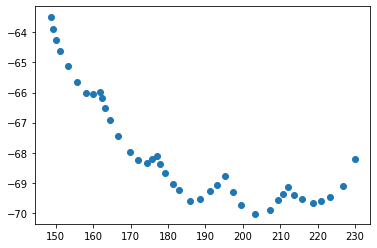

In [50]:
plt.scatter(delphi['lon'], delphi['lat'])

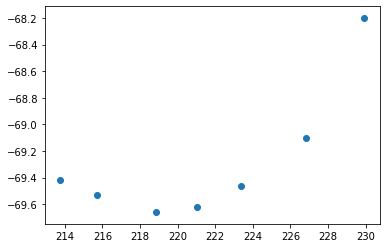

In [51]:
temp = delphi[34:]

plt.scatter(temp['lon'], temp['lat'])

In [52]:
arcs = [
    delphi[0:9],
    delphi[9:18],
    delphi[18:27],
    delphi[27:34],
    delphi[34:]
]

In [1]:
all_curves = None
all_arcs = None

for arc in arcs:
    curve = fit_arc(arc)
    all_curves = curve if all_curves is None else pd.concat([all_curves, curve], ignore_index=True)
    field = get_stress_field(interior, curve, 300)
        
    matches = match_orientations(curve, field)
    all_arcs = matches if all_arcs is None else pd.concat([all_arcs, matches], ignore_index=True)
    print("Finished an arc...")


NameError: name 'arcs' is not defined

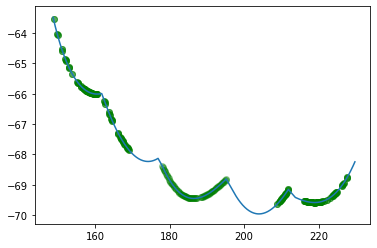

In [60]:
plt.plot(all_curves['lon'], all_curves['lat'])
# plt.scatter(delphi['lon'], delphi['lat'])
plt.scatter(all_arcs['lon'], all_arcs['lat'], alpha=0.3, color='green')

In [58]:
curve = fit_arc(arcs[2])
results = test_arc(curve, 10)
display(results)

Calculated for phase 0
Calculated for phase 10
Calculated for phase 20
Calculated for phase 30
Calculated for phase 40
Calculated for phase 50
Calculated for phase 60
Calculated for phase 70
Calculated for phase 80
Calculated for phase 90
Calculated for phase 100
Calculated for phase 110
Calculated for phase 120
Calculated for phase 130
Calculated for phase 140
Calculated for phase 150
Calculated for phase 160
Calculated for phase 170
Calculated for phase 180
Calculated for phase 190
Calculated for phase 200
Calculated for phase 210
Calculated for phase 220
Calculated for phase 230
Calculated for phase 240
Calculated for phase 250
Calculated for phase 260
Calculated for phase 270
Calculated for phase 280
Calculated for phase 290
Calculated for phase 300
Calculated for phase 310
Calculated for phase 320
Calculated for phase 330
Calculated for phase 340
Calculated for phase 350
Calculated for phase 360


,phase,error
0,0,56.0
1,10,45.0
2,20,13.0
3,30,9.0
4,40,9.0
5,50,9.0
6,60,9.0
7,70,9.0
8,80,9.0
9,90,9.0


# ~TODO: Add diffs to stress field frame to determine increase or decrease~
# TODO: Allow heading match tolerance < 1 degree


In [74]:
all_arcs

,pointNumber,lon,lat,heading_x,headingCategory,stress,heading_y,time,maxStress
0,2,148.749713,-63.543963,297.886436,298.0,132.472097,297.532406,69.0,132.472097
1,10,149.723525,-64.020841,294.330025,294.0,121.197096,293.588114,68.0,121.197096
2,11,149.847167,-64.076188,293.900534,294.0,121.197954,293.664491,68.0,121.197954
3,20,150.977326,-64.533298,290.189759,290.0,111.002725,290.277362,67.0,111.002725
4,21,151.104710,-64.579642,289.794762,290.0,111.018365,290.381566,67.0,111.018365
...,...,...,...,...,...,...,...,...,...
268,87,227.677066,-68.761532,258.023047,258.0,81.491614,258.386525,241.0,81.491614
269,88,227.837606,-68.727064,257.741971,258.0,41.803118,258.352876,207.0,41.803118
270,93,228.641089,-68.542007,256.313399,256.0,47.904788,256.163069,206.0,47.904788
271,94,228.801959,-68.502400,256.023348,256.0,48.063940,256.334907,206.0,48.063940


# Let's do this cleaner

In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import curves.bezier as bezier
import curves.fitCurves as fit
import StressTools as tools
import utils
import fitting

interior = utils.import_interior('interior1')

TOLERANCE = 1

delphi = pd.read_csv("./obsData/DelphiLonLatAT.txt", header=None, sep=' ', names=['lon', 'lat'])
delphi = delphi.sort_values(['lon', 'lat'])

arcs = [
    delphi[0:9],
    delphi[9:18],
    delphi[18:27],
    delphi[27:34],
    delphi[34:]
]

In [2]:
all_curves = None
all_arcs = None
all_stress = None

for index, arc in enumerate(arcs):
    startingPoint = index * 100 + 1
    curve = fitting.fit_arc(arc, startingPoint=startingPoint)
    curve['lon'] = curve['lon'] + 60
    all_curves = curve if all_curves is None else pd.concat([all_curves, curve], ignore_index=True)
    field = tools.get_simon_stress_field(
        interior, 
        curve, 
        90,
        0.01,
        0.44,
        0,
        is_async=True, 
        steps=850)
        
    matches = fitting.match_orientations(curve, field, positive_only=True)
    all_arcs = matches if all_arcs is None else pd.concat([all_arcs, matches], ignore_index=True)
    all_stress = field if all_stress is None else pd.concat([all_stress, field], ignore_index=True)
    print("Finished an arc...")
    

Finished an arc...
Finished an arc...
Finished an arc...
Finished an arc...
Finished an arc...


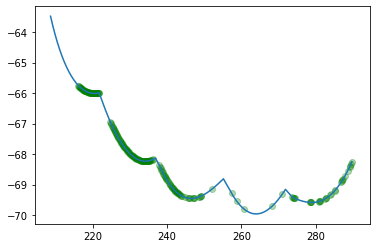

In [3]:
import matplotlib.pyplot as plt

plt.plot(all_curves['lon'], all_curves['lat'])
plt.scatter(all_arcs['lon'], all_arcs['lat'], alpha=0.3, color='green')

In [4]:
fit_data = fitting.test_arc(
    all_curves, 
    10, 
    interior,
    0.01,
    0.44,
    0,
    steps=850, 
    positive_only=True)

Calculated for phase 0
Calculated for phase 10
Calculated for phase 20
Calculated for phase 30
Calculated for phase 40
Calculated for phase 50
Calculated for phase 60
Calculated for phase 70
Calculated for phase 80
Calculated for phase 90
Calculated for phase 100
Calculated for phase 110
Calculated for phase 120
Calculated for phase 130
Calculated for phase 140
Calculated for phase 150
Calculated for phase 160
Calculated for phase 170
Calculated for phase 180
Calculated for phase 190
Calculated for phase 200
Calculated for phase 210
Calculated for phase 220
Calculated for phase 230
Calculated for phase 240
Calculated for phase 250
Calculated for phase 260
Calculated for phase 270
Calculated for phase 280
Calculated for phase 290
Calculated for phase 300
Calculated for phase 310
Calculated for phase 320
Calculated for phase 330
Calculated for phase 340
Calculated for phase 350
Calculated for phase 360


,phase,error
0,0,154.0
1,10,167.0
2,20,187.0
3,30,199.0
4,40,152.0
5,50,143.0
6,60,105.0
7,70,72.0
8,80,88.0
9,90,58.0


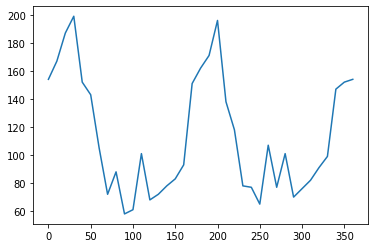

In [5]:
plt.plot(fit_data['phase'], fit_data['error'])
display(fit_data)

In [3]:
error = fitting.find_heading_error(all_curves, all_stress)

(array([385.,  37.,  15.,  10.,  10.,   9.,   9.,   7.,   2.,  16.]),
 array([1.12931207e-03, 3.86888112e+00, 7.73663292e+00, 1.16043847e+01,
        1.54721365e+01, 1.93398883e+01, 2.32076401e+01, 2.70753920e+01,
        3.09431438e+01, 3.48108956e+01, 3.86786474e+01]),
 <a list of 10 Patch objects>)

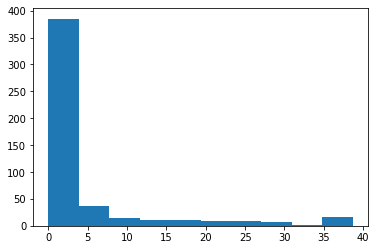

In [4]:
plt.hist(error['deltaHeading'])

In [15]:
ITERATIONS = 1
BATCH_SIZE = 32

# params = np.array([90, 0.44, 30]) # phase, obliquity, longitude
params = np.array([0.25, 0.07, 0.15]) # phase, obliquity, longitude
min_vals = np.array([0, 0, 1])
max_vals = np.array([360, np.pi * 2, 180])

def gradient(batch):
    variables = params * max_vals + min_vals
    test_data = batch.copy()
    test_data['lon'] = test_data['lon'] + variables[2]
    
    field = tools.get_simon_stress_field(
        interior, 
        test_data, 
        phase=variables[0],
        eccentricity=0.01,
        obliquity=variables[1],
        nsr=0,
        is_async=True, 
        steps=850)
    error = fitting.find_heading_error(test_data, field)
    heading_error = error['deltaHeading']
    norm_error = (heading_error - heading_error.min()) / (heading_error.max() - heading_error.min())

    return norm_error, field

for iter in range(1, ITERATIONS + 1):
    batch = all_curves.sample(BATCH_SIZE)
    result, field = gradient(batch)
    


________________________________________________________________________________
[Memory] Calling StressTools.build_simon_stress_field...
build_simon_stress_field(<utils.Interior object at 0x7f84e0b0b3d0>,      pointNumber         lon        lat     heading  headingCategory
213          214  268.189861 -68.898716  280.821546            281.0
412          413  303.744498 -69.518009  272.340047            272.0
79            80  246.993819 -65.984548  272.189180            272.0
413          414  303.908829 -69.524591  272.246235            272.0
377          378  296.651553 -69.666778  263.018020            263.0
327          328  289.354657 -69.861349  274.526766            275.0
326          327  289.208371 -69.849429  274.790157            275.0
32            33  240.657805 -65.069841  285.324300            285.0
188          189  263.193801 -68.218868  268.317429            268.0
178       ..., phase=90.0, eccentricity=0.01, obliquity=0.4398229715025711, nsr=0, is_async=True, steps=

In [6]:
def loss(params):
    print(f"Running loss function with params {params}")
    phase, obliquity, longitude = params
    test_data = all_curves.copy()
    test_data['lon'] = test_data['lon'] + longitude
    
    field = tools.get_simon_stress_field(
        interior, 
        test_data, 
        phase=phase,
        eccentricity=0.01,
        obliquity=obliquity,
        nsr=0,
        is_async=True, 
        steps=360)
    error = fitting.find_heading_error(test_data, field)
    result = error['deltaHeading']
    
    root_mean_squared_error = np.sqrt(np.sum(np.power(result, 2))) / result.shape[0]
    
    print(f'Loss Output: {root_mean_squared_error}')
    return root_mean_squared_error

def loss_der(params):
    phase, obliquity, longitude = params
    test_data = all_curves.copy()
    test_data['lon'] = test_data['lon'] + longitude
    
    field = tools.get_simon_stress_field(
        interior, 
        test_data, 
        phase=phase,
        eccentricity=0.01,
        obliquity=obliquity,
        nsr=0,
        is_async=True, 
        steps=360)
    error = fitting.find_heading_error(test_data, field)
    result = error['deltaHeading']    
    
    # calculate jacobian
    diffs = np.insert(np.diff(result), 0, result.iloc[0], axis=0)
    jac = np.array([[error/param for param in params] for error in diffs])
    
    root_mean_squared_error = np.sqrt(np.sum(np.power(result, 2))) / result.shape[0]

    loss_vector = np.array([root_mean_squared_error/error for error in result])
    
    return loss_vector @ jac

  

In [7]:
from scipy.optimize import minimize


initial = [90, 0.44, 60]
opt = minimize(loss, initial, method='L-BFGS-B', jac=loss_der,
               bounds=[(0, 360), (0, 1), (0, 360)],
               options={ 'maxiter': 5000, 'disp': 1})

Running loss function with params [90.    0.44 60.  ]
Loss Output: 0.3411638430737436
Running loss function with params [91.97226475  1.         62.95839713]
Loss Output: 0.3850077379683605
Running loss function with params [90.56414634  0.60018232 60.8462195 ]
Loss Output: 0.35271823789109646
Running loss function with params [90.15819055  0.48491624 60.23728583]
Loss Output: 0.35424203677252747
Running loss function with params [90.04098493  0.45163716 60.0614774 ]
Loss Output: 0.3501917910917616
Running loss function with params [90.00685361  0.441946   60.01028042]
Loss Output: 0.34283886540086744
Running loss function with params [90.00175594  0.44049858 60.00263392]
Loss Output: 0.3414344835012022
Running loss function with params [90.00047017  0.4401335  60.00070525]
Loss Output: 0.34123303432832913
Running loss function with params [90.00012432  0.4400353  60.00018648]
Loss Output: 0.34118198506776376
Running loss function with params [90.00002293  0.44000651 60.00003439]
Loss 

In [11]:
result = loss([90, 0.44, 60])

In [12]:
result

0.32359810520777293

In [72]:
opt

      fun: 0.3411638430737895
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  -1.97226475, -403.41779017,   -2.95839713])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 21
      nit: 0
   status: 2
  success: False
        x: array([90.  ,  0.44, 60.  ])

In [6]:
loss([89.98245796,  0.36734444, 59.99706506])

0.33778615223444164

In [43]:
def stress_match(params):
    phase, obliquity, longitude = params
    test_data = all_curves.copy()
    test_data['lon'] = test_data['lon'] + longitude
    
    field = tools.get_simon_stress_field(
        interior, 
        test_data, 
        phase=phase,
        eccentricity=0.01,
        obliquity=obliquity,
        nsr=0,
        is_async=True, 
        steps=360)
    result = fitting.find_heading_error(test_data, field)
    
    return result

In [19]:
result = stress_match([89.98245796,  0.36734444, 59.99706506])

In [79]:
model = dict(
    W1=np.random.randn(2, 3), # feature, hidden
    W2=np.random.randn(3, 1)  # hidden, output
)
model

{'W1': array([[-0.84000904,  0.87420536,  2.33172707],
        [ 1.76483526,  0.07432993,  1.13051403]]),
 'W2': array([[1.61455817],
        [1.0288251 ],
        [0.76341441]])}

In [52]:
# np.array(result['deltaHeading']).T
xtrain = np.array(result[['lon', 'lat']])
ytrain = np.array([0] * xtrain.shape[0])


In [69]:
# x = input array
# f = change in objective function values
# j = jacobian matrix of partial derivitives (gradient)
# l = scaler loss
# v = loss vector

x = np.array([89.98245796,  0.36734444, 59.99706506]) 
f = np.diff(result['deltaHeading'])
f = np.insert(f, 0, result['deltaHeading'].iloc[0], axis=0)

# j = np.array([[error/x[0], error/x[1], error/x[2]] for error in f])
j = np.array([[error/dx for dx in x] for error in f])

l = np.sqrt(np.sum(np.power(result['deltaHeading'], 2))) / result['deltaHeading'].shape[0]
v = np.array([l/error for error in result['deltaHeading']])

print(v.shape)
print(j.shape)

v @ j

(500,)
(500, 3)


array([  -1.15145017, -282.05222398,   -1.72692308])

In [98]:
def backward(xs, hs, errs, output):
    w2 = hs.T @ errs
    dh = output @ model['W2'].T
    dh[hs <= 0] = 0
    dh[hs >= 1] = 1
    
    w1 = xs.T @ dh
    
    return dict(W1=w1, W2=w2)
    
def grad():
    xs, hs, errs = [], [], []

    for row in result.itertuples():
        x = np.array([row.lon, row.lat])
        h = x @ model['W1']
        err = row.deltaHeading

        xs.append(x)
        hs.append(h)
        errs.append(err)
    
    delta = result['deltaHeading']
    root_mean_squared_error = np.sqrt(np.sum(np.power(delta, 2))) / delta.shape[0]
    back = backward(np.array(xs), np.array(hs), np.array(errs), np.array([root_mean_squared_error]))
        
    return back

value = grad() 

IndexError: too many indices for array

In [92]:
value

{'W1': array([[-58503593.56766132,  40808090.69663554,  99051181.04307832],
        [ 12934548.37269042,  -9011359.8847148 , -21864838.00879937]]),
 'W2': array([-768881.50386406,  546619.11429793, 1334274.71309727])}

In [104]:
delta = np.gradient(result.sort_values('pointNumber')['deltaHeading'])
rmse = np.sqrt(np.sum(np.power(delta, 2))) / delta.shape[0]

rmse

0.017806735733634425

In [16]:
np.diff([89.98245796,  0.36734444, 59.99706506]) / 2

array([-44.80755676,  29.81486031])

## Trying out Adam optimizer

In [86]:
min_vals = np.array([0, 0, 0])
max_vals = np.array([360, 1, 360])

def objective(batch, params):
#     print(f"Running objective function with params {params}")
    variables = params * max_vals + min_vals # denormalize
    phase, obliquity, longitude = variables
    test_data = batch.copy()
    test_data['lon'] = test_data['lon'] + longitude
    
    field = tools.get_simon_stress_field(
        interior, 
        test_data, 
        phase=phase,
        eccentricity=0.01,
        obliquity=obliquity,
        nsr=0,
        is_async=True, 
        steps=360)
    error = fitting.find_heading_error(test_data, field)
    result = error['deltaHeading']
    
    root_mean_squared_error = np.sqrt(np.sum(np.power(result, 2))) / result.shape[0]
    
     # calculate jacobian & gradient
    diffs = np.insert(np.diff(result), 0, result.iloc[0], axis=0)
    jac = np.array([[(-1*error)/param for param in params] for error in diffs])
    loss_vector = np.array([root_mean_squared_error/error for error in result])
    gradient = loss_vector @ jac
    
    print(f'Loss Output: {root_mean_squared_error}')
    
    return root_mean_squared_error, gradient

In [93]:
alpha = 1e-3
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

ITERATIONS = 250
CONVERGE_THRESHOLD = 0.01
BATCH_SIZE = 128

params = np.array([0.25, 0.07, 0.15]) # phase, obliquity, longitude

best_case = dict(loss=100, parameters=params)
worst_case = dict(loss=0, parameters=params)
losses = []

# variables = params * max_vals + min_vals

moment = [np.zeros_like(params)]
raw_moment = [np.zeros_like(params)]


# for iteration in range(1, ITERATIONS + 1):
loss = 100
iteration = 1
while loss > CONVERGE_THRESHOLD and iteration < ITERATIONS:
    batch = batch = all_curves.sample(BATCH_SIZE)
    
    params * max_vals + min_vals
    loss, gradient = objective(batch, params)
    
    losses.append(loss)
    if loss < best_case['loss']:
        best_case['loss'] = loss
        best_case['parameters'] = params
        
    if loss > worst_case['loss']:
        worst_case['loss'] = loss
        worst_case['parameters'] = params
    
    
    moment.append(beta1 * moment[iteration - 1] + (1. - beta1) * gradient)
    raw_moment.append(beta2 * raw_moment[iteration - 1]  + (1. - beta2) * gradient**2)
    
#     corrected_moment = moment[iteration]/(1. - beta1**iteration)
#     corrected_raw = raw_moment[iteration]/(1. - beta2**iteration)
    
    learning_rate = alpha * (np.sqrt(1. - beta2**iteration)/(1. - beta1**iteration))
    params = params - learning_rate * moment[iteration]/(np.sqrt(raw_moment[iteration]) + epsilon)
#     params = params - alpha * corrected_moment/(np.sqrt(corrected_raw) + epsilon)
    params[params >=  1] = 1
    params[params <= 0] = 0
    
    iteration += 1
    
    

Loss Output: 0.3144171603453481
Loss Output: 0.38519468373331717
Loss Output: 0.4255930908363974
Loss Output: 0.3576369744240297
Loss Output: 0.21315418262197292
Loss Output: 0.24899466060496098
Loss Output: 0.32040669891691087
Loss Output: 0.37846174921348397
Loss Output: 0.36616355107541154
Loss Output: 0.3216720285861347
Loss Output: 0.29215026814405315
Loss Output: 0.30107573954435646
Loss Output: 0.2781281695505241
Loss Output: 0.16779662879427315
Loss Output: 0.34430424732112125
Loss Output: 0.24738449670682086
Loss Output: 0.27915595726640313
Loss Output: 0.2827730342491109
Loss Output: 0.2671128001105605
Loss Output: 0.2592188066621719
Loss Output: 0.306580064475887
Loss Output: 0.2066891821142389
Loss Output: 0.13759031501858335
Loss Output: 0.2215534949639547
Loss Output: 0.2180666100648128
Loss Output: 0.20946169030124298
Loss Output: 0.2129357419639709
Loss Output: 0.1705153529897657
Loss Output: 0.17504296312767575
Loss Output: 0.19635694125691602
Loss Output: 0.1891762207

In [94]:
variables = best_case['parameters'] * max_vals + min_vals
bad_vars = worst_case['parameters'] * max_vals + min_vals
print(variables)
print(bad_vars)

[7.99349667e+01 4.11800662e-02 4.38635654e+01]
[8.92863307e+01 6.80184789e-02 5.32864132e+01]


In [95]:
display(best_case)
display(worst_case)

{'loss': 0.06425429010431952,
 'parameters': array([0.22204157, 0.04118007, 0.12184324])}

{'loss': 0.4255930908363974,
 'parameters': array([0.24801759, 0.06801848, 0.14801781])}

In [96]:
data = stress_match(variables)
bad_data = stress_match(bad_vars)

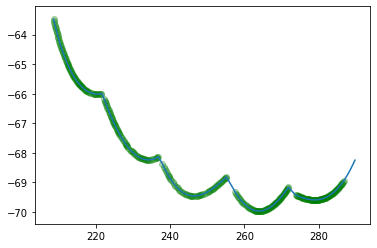

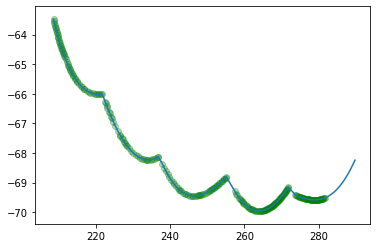

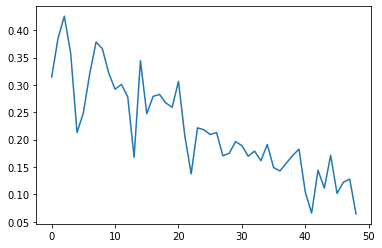

In [97]:
import matplotlib.pyplot as plt


fit_points = data.loc[data['deltaHeading'] < 0.25].copy()

fit_points['lon'] = fit_points['lon'] - variables[2]
plt.plot(all_curves['lon'], all_curves['lat'])
plt.scatter(fit_points['lon'], fit_points['lat'], alpha=0.3, color='green')

plt.figure()

fit_points = bad_data.loc[bad_data['deltaHeading'] < 0.25].copy()

fit_points['lon'] = fit_points['lon'] - bad_vars[2]
plt.plot(all_curves['lon'], all_curves['lat'])
plt.scatter(fit_points['lon'], fit_points['lat'], alpha=0.3, color='green')

plt.figure()

plt.plot(losses)

In [98]:
variables

array([7.99349667e+01, 4.11800662e-02, 4.38635654e+01])

In [57]:
fit_points.shape

(236, 9)